# Step 1 : Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/shailioza/Documents/CareerFoundry Projects/Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_merged.pkl'))

In [4]:
df.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,True
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,2398795,1,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2,473747,1,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,3,2254736,1,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,4,431534,1,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
df.dtypes

Unnamed: 0                   int64
order_id                     int64
user_id                     object
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
price_range_loc             object
max_order                    int64
loyalty_flag                object
avg_price                  float64
spending_flag               object
median_freq                float64
order_freq_flag             object
First Name                  object
Last Name                   object
Gender                      object
STATE               

# Step 2: Creating charts

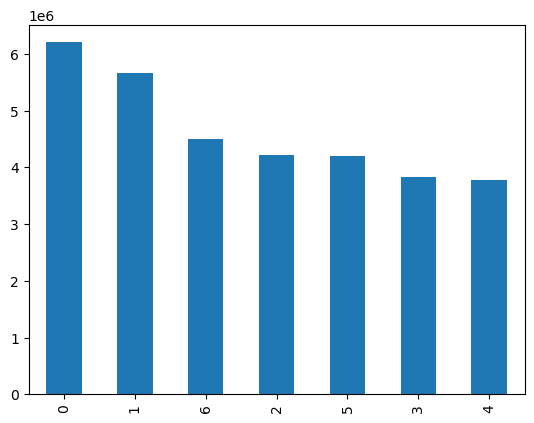

In [6]:
# Bar Chart for orders_day_of_week

bar = df['orders_day_of_week'].value_counts().plot.bar()

In [7]:
# Exporting bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ords_dow.png'))

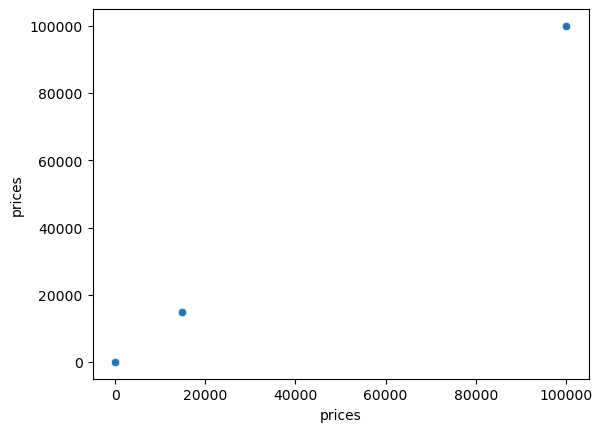

In [8]:
# Scatterplot for prices

scatplt = sns.scatterplot(x ='prices', y ='prices', data = df)

There seems to be many outliers showing extravagantly high prices. We need to remove those outliers for further analysis.

In [9]:
# Removing the high prices by changing them to nan

df.loc[df['prices']>100, 'prices'] = np.nan

In [10]:
df['prices'].max()

25.0

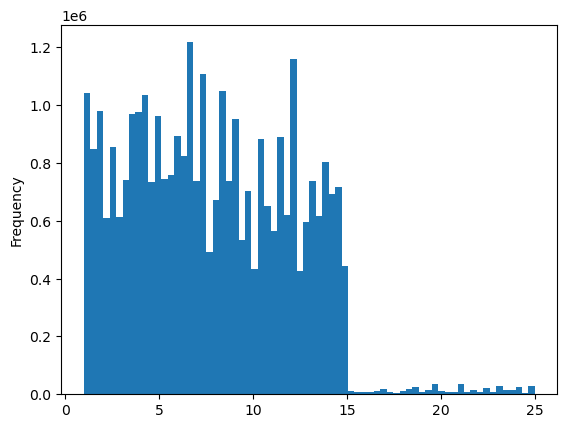

In [11]:
# Histogram for prices

hist = df['prices'].plot.hist(bins = 70)

In [12]:
# Exporting the histogram

hist.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'hist_prices_70.png' ))

In [13]:
# Assign random numbers between 0-1 to a list then length of the dataframe

# Making an array (dev) containing the values less than or equal to 0.7

# We will use seed 4 in the random number generator for consistency

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [14]:
# Store 70% of the sample in the dataframe big
big = df[dev]

In [15]:
# Store 30% of the sample in the dataframe small
small = df[~dev]

In [16]:
len(df)

32404859

In [17]:
len(big) + len(small)

32404859

In [18]:
df_2 = small [['orders_day_of_week', 'prices']]

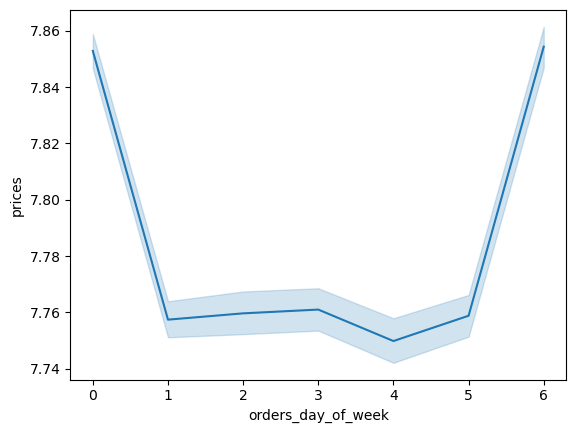

In [19]:
# Line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [20]:
# Exporting the line chart

line.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_ords_dow.png'))

# Step 3

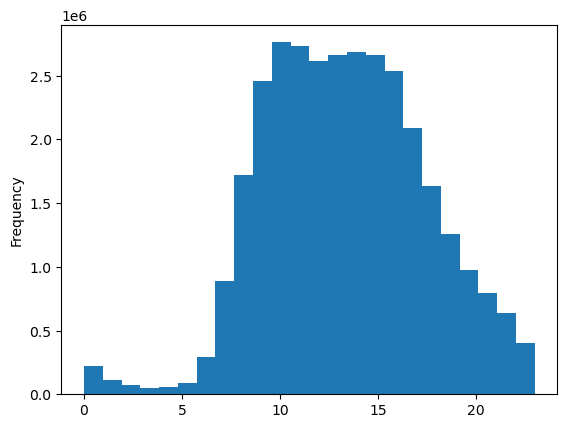

In [21]:
# Histogram for hours of the day under hist_hour

hist_hour = df['order_hour_of_day'].plot.hist(bins = 24)

The histogram represents that the sales start increasing at around 8 am and peak at 10 pm. Then they start coming down towards the end of the day, after 3 pm.

In [22]:
# Exporting the histogram

hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_hod.png'))

# Step 4: Loyalty flag

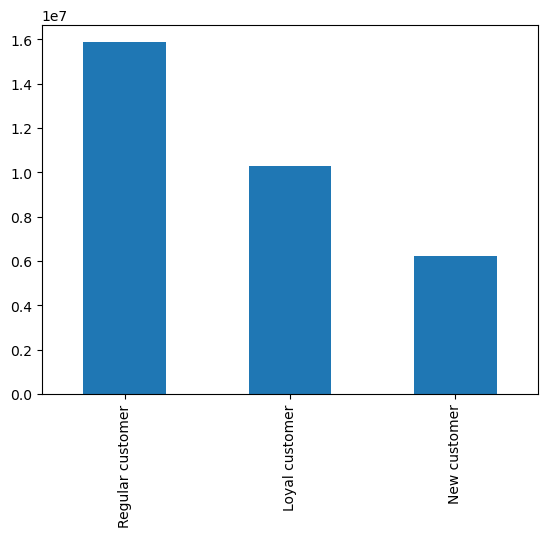

In [31]:
cust_bar = df['loyalty_flag'].value_counts().plot.bar()

This indicates that maximum orders come from regular customers, followed by loyal customers and new customers. 

In [32]:
# Exporting the chart
cust_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'customer_loyalty.png'))

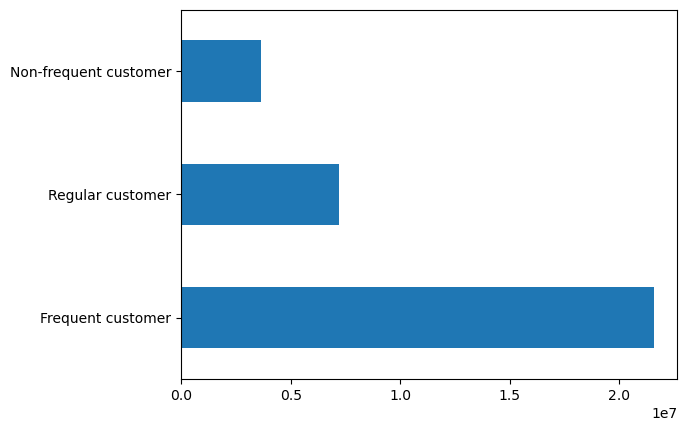

In [34]:
cust_bar = df['order_freq_flag'].value_counts().plot.barh()
df.plot.barh(x='Category', y='Values', legend=False)

# Step 5:

In [24]:
df_3 = small[['prices', 'order_hour_of_day'] ]

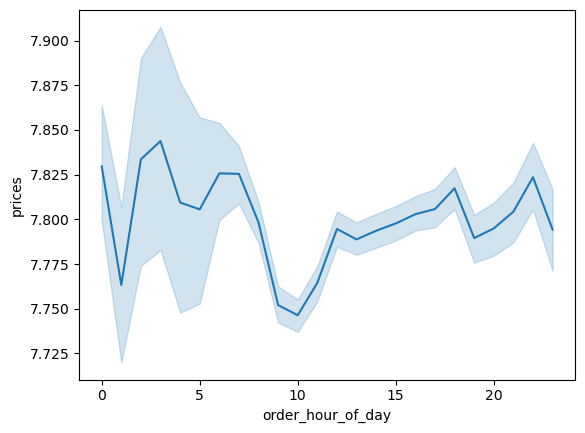

In [25]:
line_hour = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [26]:
# Exporting the line graph

line_hour.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'hourof_line.png'))

# Step 6

In [27]:
df_4 = small[['Age', 'n_dependants']]

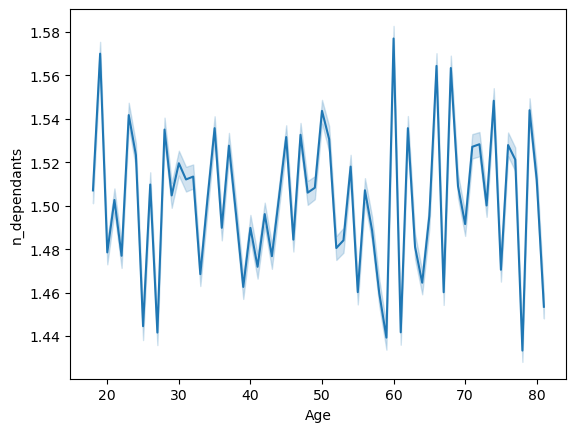

In [28]:
line_age = sns.lineplot (data = df_4, x = 'Age', y = 'n_dependants')

There doesn't seem to be any trend between age and number of dependants 

In [29]:
# Exporting the linechart

line_age.figure.savefig(os.path.join (path,'04 Analysis', 'Visualizations', 'age_dependants_line.png'))

# Step 7:

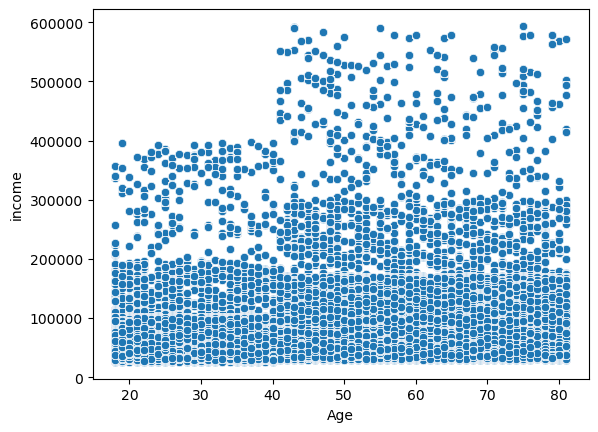

In [4]:
# Creating a scatterplot of age and income

scatter_income = sns.scatterplot(data = df, x = 'Age', y = 'income')

There seems to be a wide range of income brackets. But, there seems to be a steep rise in income at the age of 40, which then, seems to remain stable. 

In [5]:
# Exporting the scatterplot

scatter_income.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'income_scatter.png'))

# Step 8 : All visualizations exported

In [6]:
df['n_dependants'].value_counts(dropna = False)

3    8135109
0    8097503
2    8091143
1    8081104
Name: n_dependants, dtype: int64